# Welcome to Day 2
For later... https://bit.ly/2MEcpYM

# More Time Series Analysis

In [1]:
import pandas as pd

## Interpolation

In [46]:
rain = pd.read_csv("D:/Data/Rainfall/10010.csv", names=["Date", "Rain"], index_col="Date", parse_dates=["Date"])

In [47]:
weekly = rain.asfreq("W")

In [48]:
rain['weekly'] = weekly

In [8]:
rain.loc["2000"]

,Rain,weekly
Date,,
2000-01-01,179.514368,NaN
2000-02-01,130.529529,NaN
2000-03-01,235.893511,NaN
2000-04-01,298.959012,NaN
2000-05-01,282.654166,NaN
2000-06-01,204.684638,NaN
2000-07-01,161.817207,NaN
2000-08-01,133.597649,NaN
2000-09-01,112.913940,NaN


In [49]:
rain['filled'] = rain['weekly'].interpolate() # Easy to interpolate, but make sure the data is in order, and that the even is something relatively consistent

In [51]:
%matplotlib inline

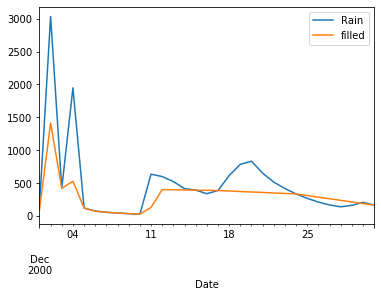

In [54]:
rain.loc["2000-12", ["Rain", "filled"]].plot(kind='line')

In [52]:
ts = pd.read_hdf("D:/Data/AAPL.h5")

In [55]:
ts.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2012-12-05', '2012-12-06', '2012-12-07', '2012-12-10',
               '2012-12-11', '2012-12-12', '2012-12-13', '2012-12-14',
               '2012-12-17', '2012-12-18'],
              dtype='datetime64[ns]', name='Date', length=3261, freq=None)

In [57]:
ts.describe() # executive summary, gives very general stats on the columns

,Open,High,Low,Close,Volume,Adj Close
count,3261.000000,3261.000000,3261.000000,3261.000000,3.261000e+03,3261.000000
mean,145.656900,147.435354,143.595624,145.569473,2.149814e+07,136.633554
std,160.485021,161.767461,158.765382,160.317263,1.485484e+07,163.856865
min,12.990000,13.190000,12.720000,13.120000,1.405000e+06,6.500000
25%,24.540000,25.040000,24.070000,24.670000,1.156680e+07,12.230000
50%,85.160000,86.380000,83.940000,85.210000,1.724560e+07,70.750000
75%,190.120000,192.000000,187.820000,189.950000,2.749240e+07,188.280000
max,702.410000,705.070000,699.570000,702.100000,2.650690e+08,698.910000


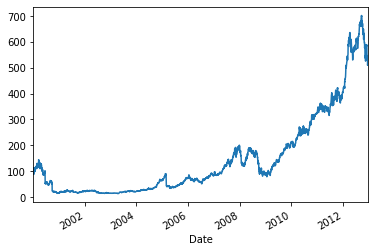

In [59]:
ts['Close'].plot()

In [60]:
ts.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,104.87,112.50,101.69,111.94,19144400,27.74
2000-01-04,108.25,110.62,101.19,102.50,18310000,25.40
2000-01-05,103.75,110.56,103.00,104.00,27818000,25.77
2000-01-06,106.12,107.00,95.00,95.00,27443200,23.54
2000-01-07,96.50,101.00,95.50,99.50,16463200,24.66


In [62]:
ts.resample("Y")['Volume'].sum() # total volume of each year since 2000

Date
2000-12-31     4298582600
2001-12-31     3380921000
2002-12-31     2750497400
2003-12-31     2543937600
2004-12-31     4350059600
2005-12-31     6514321000
2006-12-31     7703477400
2007-12-31     8820760200
2008-12-31    10213471500
2009-12-31     5116040000
2010-12-31     5393747400
2011-12-31     4430740100
2012-12-31     4588894400
Freq: A-DEC, Name: Volume, dtype: int64

In [68]:
ts['Difference'] = ts['Close'] - ts['Open']
ts.loc['2005':'2010']['Difference'].idxmax() # date with max difference between 2005 and 2010

Timestamp('2008-07-22 00:00:00')

In [98]:
ts.asfreq("A")['Adj Close'].diff().dropna()  # diff() is difference between current value and shifted value, where shift() keeps index in place, but moves data down one, pst_change() is change as percentage 

Date
2002-12-31     -3.75
2003-12-31      3.49
2004-12-31     21.33
2008-12-31   -111.74
2009-12-31    124.28
2010-12-31    110.84
Name: Adj Close, dtype: float64

# Interactive visualisation with Altair

matplotlib was for matlab users who wanted to move to python 

In [109]:
!pip install altair vega

In [110]:
!pip install --proxy=http://top-proxy01.core.mco.pr.top.sda.corp.telstra.com:3128 altair vega
    

In [123]:
populations = pd.read_csv("D:/Data/country_populations_by_year.csv", index_col="Country Name")
populations.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [124]:
countries_of_interest = ["Australia", "New Zealand", "Netherlands", "Greece"]
country_populations = populations.loc[countries_of_interest, '1960':'2017']

In [125]:
pop = country_populations.reset_index().melt(id_vars="Country Name")
pop.head()

,Country Name,variable,value
0,Australia,1960,10276477.0
1,New Zealand,1960,2371800.0
2,Netherlands,1960,11486631.0
3,Greece,1960,8331725.0
4,Australia,1961,10483000.0


In [126]:
pop.rename(columns={"variable": "Year", "value":"Population"}, inplace=True)

In [127]:
pop.head()

,Country Name,Year,Population
0,Australia,1960,10276477.0
1,New Zealand,1960,2371800.0
2,Netherlands,1960,11486631.0
3,Greece,1960,8331725.0
4,Australia,1961,10483000.0


In [128]:
import altair as alt

In [129]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [130]:
chart = alt.Chart(pop)

In [131]:
chart.mark_point() # refer to page 155

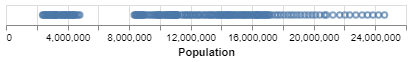

In [137]:
tick_chart = chart.mark_point()
tick_chart.encode(
    x="Population"
)

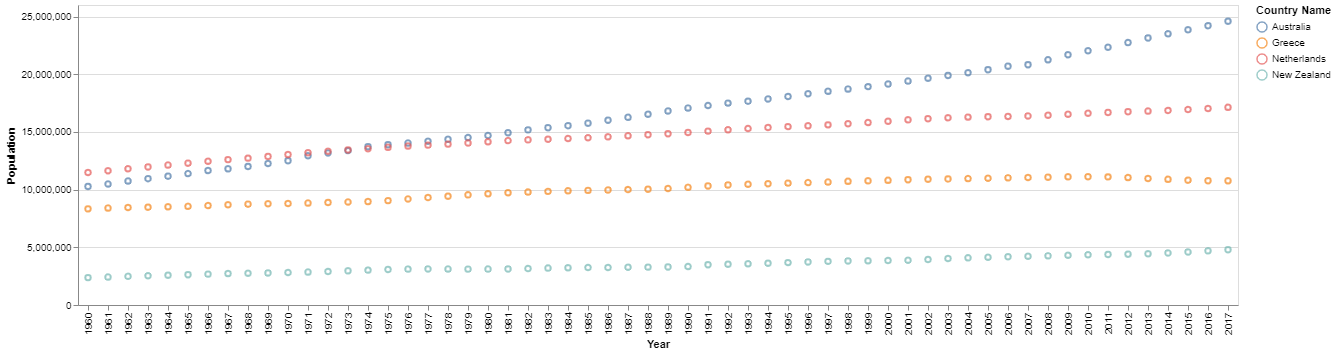

In [140]:
line_chart = chart.mark_point()
line_chart.encode(
    x="Year",
    y="Population",
    color="Country Name"
)

## Exercise: Plotting the MPG vs Acceleration for cars

In [141]:
cars = pd.read_csv("D:/Data/Auto.csv")

In [161]:
cars

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,6,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,7,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,8,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,9,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,10,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


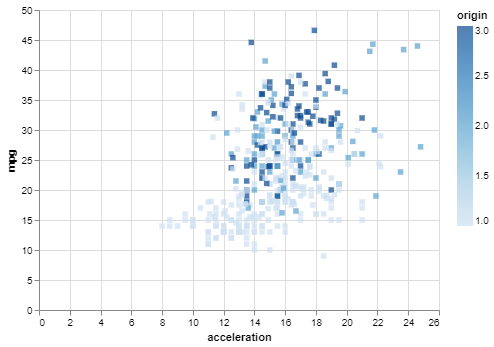

In [153]:
cars_chart = alt.Chart(cars)
line_chart = cars_chart.mark_square()
line_chart.encode(
    x="acceleration",
    y="mpg",
    color="origin"
)

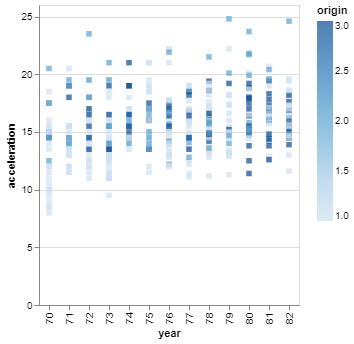

In [155]:
line_chart = cars_chart.mark_square()
line_chart.encode(
    alt.X("year", type='ordinal'), # can use alt.X or alt.Y for extra features
    y="acceleration",
    color="origin"
)

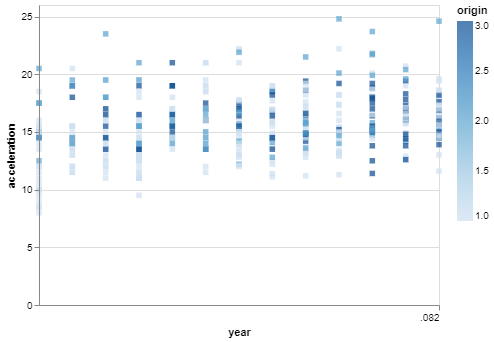

In [156]:
line_chart = cars_chart.mark_square()
line_chart.encode(
    x=("year:T"),
    y="acceleration",
    color="origin"
)

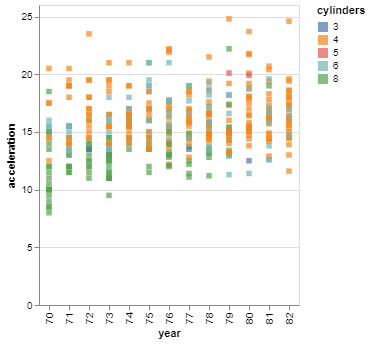

In [157]:
line_chart = cars_chart.mark_square()
line_chart.encode(
    alt.X("year", type='ordinal'),
    alt.Y("acceleration"),
    alt.Color('cylinders', type='nominal')
)

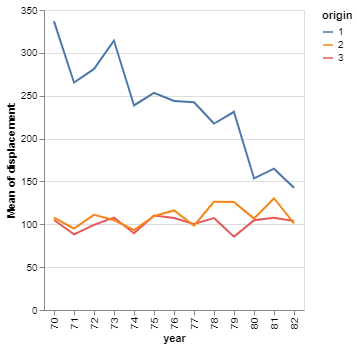

In [160]:
line_chart = cars_chart.mark_line()
line_chart.encode(
    alt.X("year", type='ordinal'),
    alt.Y("displacement", aggregate="mean"),
    alt.Color('origin', type='nominal')
)

## Exercises page 164

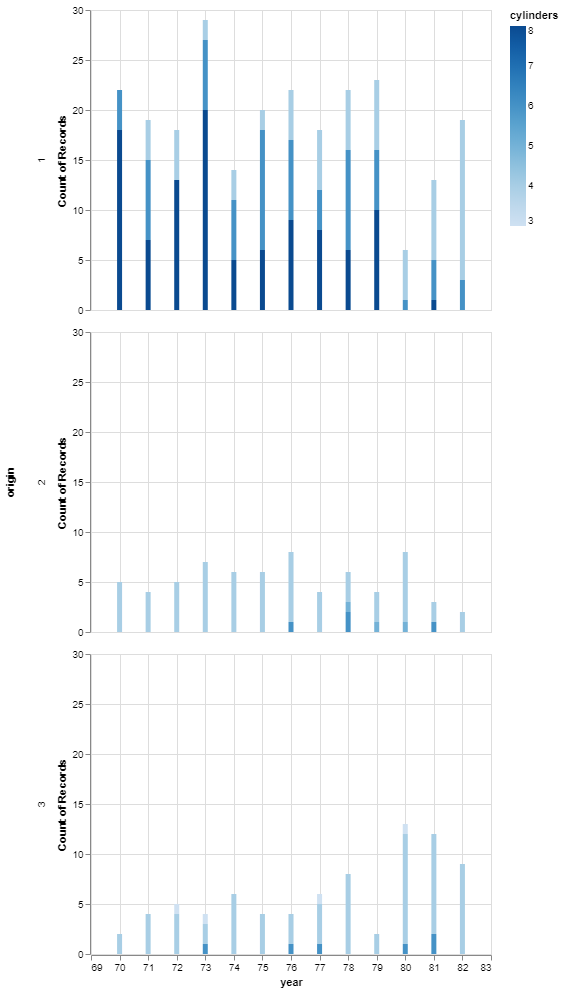

In [172]:
# how many y cylinder cars were produced by country origin in year x 
bar_chart = cars_chart.mark_bar()
bar_chart.encode(
    alt.X("year"),
    alt.Y("cylinders", aggregate="count"),
    alt.Color("cylinders"),
    alt.Row("origin")
)

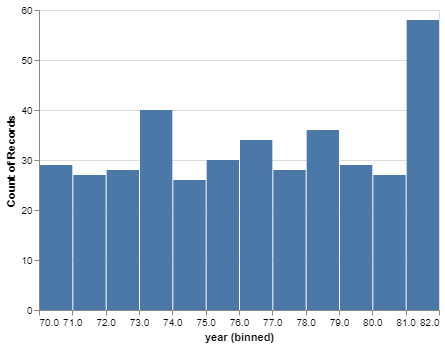

In [174]:
bar_chart.encode(
    alt.X("year", bin=alt.BinParams(maxbins=20)),
    alt.Y("count()")
)

# Linear Regression

**Exercise**

With 'Data/Auto.csv' fit an OLS model using weight as the predictor and mpg as the variable being predicted. Using weight to predict mpg.

**Extended**

Add multiple features. Try weight and cylinders as multiple input variables. Does this improve the model?

In [220]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import statsmodels.api as sm

In [221]:
cars = pd.read_csv("D:/Data/Auto.csv")

In [222]:
cars.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [223]:
weight = cars['weight']
mpg = cars['mpg']


Text(0, 0.5, 'MPG')

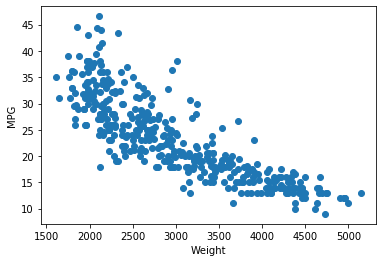

In [224]:
plt.plot(weight, mpg, 'o')
plt.xlabel('Weight')
plt.ylabel('MPG')

In [225]:
X = pd.Series(weight, name="Weight")
Y = pd.Series(mpg, name="mpg")
X = sm.add_constant(X, prepend=False) # adds an extra column with same length as X of 1s to X
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Tue, 15 Oct 2019   Prob (F-statistic):          6.02e-102
Time:                        15:25:32   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight        -0.0076      0.000    -29.645      0.0

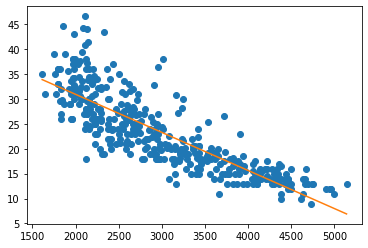

In [226]:
x = np.linspace(cars['weight'].min(), cars['weight'].max()) # evenly spaced from min to max car weight, to form x component of line
fitted = results.predict(sm.add_constant(x, prepend=False))
plt.plot(weight, mpg, 'o')
plt.plot(x, fitted)

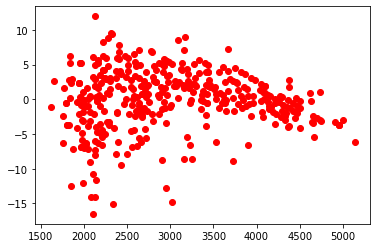

In [227]:
resid = results.predict(X) - Y
plt.plot(cars['weight'], resid, 'ro')

In [228]:
# fitting a quadratic
X = pd.DataFrame({'weight':cars['weight'], "weight**2":cars['weight']**2}) # ie y = x^2 
X = sm.add_constant(X)

In [229]:
model = sm.OLS(Y,X)
results = model.fit() 
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     488.3
Date:                Tue, 15 Oct 2019   Prob (F-statistic):          8.39e-107
Time:                        15:25:34   Log-Likelihood:                -1115.1
No. Observations:                 392   AIC:                             2236.
Df Residuals:                     389   BIC:                             2248.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.2555      2.993     20.800      0.0

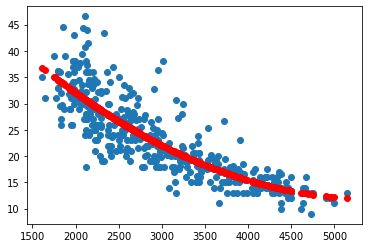

In [230]:
x = np.linspace(cars['weight'].min(), cars['weight'].max())
xx = pd.DataFrame({'weight':x, "weight**2":x**2})

y_pred = results.predict(X)
plt.plot(weight, mpg, 'o')
plt.plot(X['weight'], y_pred, 'ro')

**Exercise**

Using Patsy interface and abalone data, predict "Whole weight" from three other variables


In [244]:
import patsy
import statsmodels.formula.api as smf 

abalone = pd.read_csv("D:/Data/abalone.csv")
abalone.rename(columns={"whole weight": "whole_weight", "shucked weight":"shucked_weight", "viscera weight":"viscera_weight", "shell weight":"shell_weight"}, inplace=True) # patsy dislikes spaces, replace with _
shell_weight = abalone['shell_weight']
whole_weight = abalone['whole_weight']

In [245]:
abalone.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


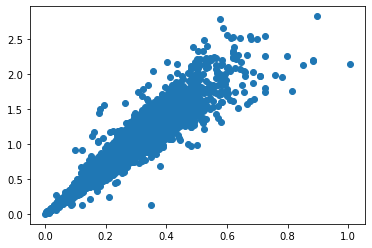

In [246]:
plt.plot(shell_weight, whole_weight, 'o')

In [251]:
# fit a model
model = smf.ols(formula="whole_weight ~ shucked_weight + viscera_weight + shell_weight", data=abalone) # sets up model, y ~ Bx is same as y = Bx
results = model.fit() # fits to the data
results.summary() # report of results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           whole_weight   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.508e+05
Date:                Tue, 15 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:34:43   Log-Likelihood:                 6855.2
No. Observations:                4177   AIC:                        -1.370e+04
Df Residuals:                    4173   BIC:                        -1.368e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0078      0.001     -5.393      0.000      -0.011      -0.005
shucked_weight     0.9366      0.009    100.770      0.000       0.918       0.955
viscera_weight     1.1116      0.021     52.737      0.000       1.070       1.153
shell_weight       1.2530      0.013     97.876      0.000       1.228       1.278
==============================================================================
Omnibus:                     1538.909   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           159541.549
Skew:                           0.777   Prob(JB):                         0.00
Kurtosis:                      33.237   Cond. No.                         35.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [257]:
x = np.linspace(abalone['whole_weight'].min(), abalone['whole_weight'].max())
y_pred = results.predict() # can pass in new data 

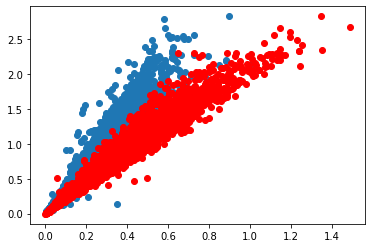

In [256]:
plt.plot(shell_weight, whole_weight, 'o')
plt.plot(abalone['shucked_weight'], y_pred, 'ro')

## Sci kit learn 

expects numpy array in 
standardized format

create shell model  

fit it 

call predict

In [258]:
import sklearn

In [260]:
abalone.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [262]:
y = abalone['whole_weight'].values # gets NumPy array with the values of whole weight
y.dtype # always check data type
y.shape # always check shape 

(4177,)

In [263]:
X = abalone[['length', 'diameter', 'height']].values
X.dtype
X.shape

(4177, 3)

In [264]:
from sklearn.linear_model import LinearRegression

In [265]:
model = LinearRegression() # model

In [266]:
model.fit(X, y) # fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [267]:
y_pred = model.predict(X) # predict,

In [269]:
y_pred # here we have trained the model on X and used it to fit, but here we only saying how well can you memorize the data rather than how well can you learn it!

array([0.54974593, 0.17061829, 0.85389535, ..., 1.20183033, 1.16797432,
       1.52632778])

In [272]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1) # want to evaluate how well our model does on NEW data, learn from training data but test it on completely new test data

In [273]:
from sklearn.model_selection import train_test_split

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y) # randomly chooses a portion to be training data and test data, but keeps the relationship between x and y 

In [276]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape # splits according to ratio of 2/3 training, 1/3 test

((3132, 3), (1045, 3), (3132,), (1045,))

In [277]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) # predict 1045 samples

In [278]:
np.sum(np.abs(y_pred - y_test)) # mean absolute error

134.65369770472878

In [279]:
np.mean((y_pred - y_test)**2) # mean squared error, big mistakes are penalised even more

0.0292238742220226

In [281]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.876582865751263

In [282]:
metrics.mean_squared_error(y_test, y_pred)

0.0292238742220226

**Exercise**

Using the Calories dataset, predict kCal from "Fat(g)", "Carbo(g)" and "Protein(g)". Use Linear Regression in scikit learn.

In [283]:
calories = pd.read_csv("D:/Data/calories.csv")
calories.head()

,Food,Measure,Weight (g),kCal,Fat (g),Carbo(g),Protein (g)
0,"1000 Island,Salad Drsng,Local",1 Tbsp,15.00,25,2,2,0
1,"1000 Island,Salad Drsng,Reglr",1 Tbsp,16.00,60,6,2,0
2,"40% Bran Flakes,Kellogg's",1 oz,28.35,90,1,22,4
3,"40% Bran Flakes,Post",1 oz,28.35,90,0,22,3
4,"Alfalfa Seeds,Sprouted,Raw",1 Cup,33.00,10,0,1,1


In [304]:
X = calories[['Fat (g)', 'Carbo(g)', 'Protein (g)']].values
X.dtype
X.shape

(960, 3)

In [305]:
y = calories['kCal'].values 
y.dtype
y.shape

(960,)

In [306]:
model = LinearRegression() # model

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y) # create test and training data

In [308]:
model.fit(X_train, y_train) # fit on training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [309]:
y_pred = model.predict(X_test) # predict a value

In [311]:
metrics.r2_score(y_test, y_pred)

0.9989167986116513